# Taller T8 I-2022

<table align='left'>
<tr>
<td><img src='https://norbertbiedrzycki.pl/wp-content/uploads/2020/03/AI-legal-regulations-Norbert-Biedrzycki-blog-3.jpg' width='750'/></td>
</tr>
</table>


Los recientes progresos en inteligencia artificial están ampliando el impacto que esta tecnología puede tener en nuestras vidas. Con ello, la preocupación por los aspectos éticos detrás de las "decisiones" automáticas que estos sistemas implementan ha causado gran debate. Por ejemplo, desde hace algunos años, el sistema penal varios países ha comenzado a apoyarse en algoritmos "inteligentes" que predicen la probabilidad de reincidencia de un sujeto en base a una serie de atributos (como respuestas a un test). 

*¿Qué tan imparciales son estos algoritmos? ¿Reproducen los sesgos que observamos en el mundo humano? ¿Es necesario intervenir estas máquinas de modo que sus decisiones no se basen en atributos protegidos?*

En este taller aplicaremos conceptos del Tema 8 para analizar las predicciones de un algoritmo utilizado para predecir riesgo de reincidencia en algunos estados de Estados Unidos.


# Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


Integrantes :

Juan Diego Arias rol_202073590-5

Alonso Maureira rol_202073589-1

Ricardo Parragué rol_202073605-7

enlace videos: https://drive.google.com/drive/folders/1ZcJlD2pbxTOWnl-avKEtqO88Kl1e7RIR

* Este taller fue realizado estrictamente por los 3 integrantes identificados en conformidad con el código de honor UTFSM *

# Datos

Los datos pueden ser descargados vía línea de comandos desde la dirección indicada abajo. 

El dataset contiene información de una muestra de personas arrestadas en el condado de Broward (Florida) entre 2013 y 2014. Cada fila es un caso de arresto diferente. El algoritmo de interés se basa en las respuestas que una persona presenta a una serie de preguntas y está diseñado para predecir el *riesgo de reincidencia** en los 2 años posteriores a la liberación. Se han incluido en el dataset sólo casos de personas que, después de liberadas, fueron nuevamente condenadas durante los 2 años posteriores a su liberación, o bien de personas que no cometieron nuevos delitos durante los 2 años posteriores a su liberación. Siguiendo recomendaciones de los autores del dataset, se excluirán del análisis los casos en que el test para el algoritmo fue aplicado antes de 30 días de la fecha declarada del arresto (esto es un error) o después de 30 días de la fecha del arresto (caso muy inusual). También se excluirán casos de personas que fueron analizadas por el algoritmo.

Para facilitar las operaciones de filtrado, transformaremos el archivo csv en un dataframe de pandas.

In [2]:
df = pd.read_csv('compas-scores-two-years.csv')
df = df[df['days_b_screening_arrest'] <= 30]
df = df[df['days_b_screening_arrest'] >= -30]
df = df[df['is_recid'] != -1]
print(len(df))

print(df.head())
print(df.columns)

6172
   id              name   first       last compas_screening_date   sex  \
0   1  miguel hernandez  miguel  hernandez            2013-08-14  Male   
1   3       kevon dixon   kevon      dixon            2013-01-27  Male   
2   4          ed philo      ed      philo            2013-04-14  Male   
5   7      marsha miles  marsha      miles            2013-11-30  Male   
6   8     edward riddle  edward     riddle            2014-02-19  Male   

          dob  age          age_cat              race  ...  v_decile_score  \
0  1947-04-18   69  Greater than 45             Other  ...               1   
1  1982-01-22   34          25 - 45  African-American  ...               1   
2  1991-05-14   24     Less than 25  African-American  ...               3   
5  1971-08-22   44          25 - 45             Other  ...               1   
6  1974-07-23   41          25 - 45         Caucasian  ...               2   

   v_score_text  v_screening_date  in_custody  out_custody  priors_count.1  \
0  

**Groundtruth.** La variable 'two_year_recid' indica si la persona efectivamente reincidió antes de 2 años de ser liberada ('two_year_recid'==1) o no ('two_year_recid'==0). La variable 'is_recid' indica si la persona reincidió antes del la fecha en que capturaron los datos. Puede ocurrir (200 casos) que una persona tenga 'two_year_recid'==0 pero 'is_recid'==1. 

**Predicción.** La predicción del algoritmo está disponible en dos escalas. La variable 'score_text' puede tomar tres valores: 'High', 'Medium', y 'Low' que corresponden a un riesgo de reincidencia alto, medio, y bajo, respectivamente. Estas predicciones serán tratadas como categóricas. La variable 'decile_score' toma valores de 1 a 10 que corresponden a los deciles de riesgo que predice el algoritmo: 1 significa que la persona está en el primer decil de riesgo, 2 que está en el segundo decil de riesgo, etc. Estas predicciones serán tratadas como numéricas. 

**Variables.** Además de la predicción del algoritmo, el dataset incluye una serie de atriubutos interesantes entre los que destacaremos: el sexo, edad y raza de la persona. El sexo ('sex') se encuentra en escala binaria ('Male', 'Female'). La edad se encuentra disponible en escala numérica ('age') y categórica ('age_cat'). En este último caso se usan tres niveles: '25 - 45' 'Greater than 45' 'Less than 25'. La raza ('race') es una variable categórica con valores posibles: 'Caucasian', 'African-American', 'Asian', 'Hispanic' , 'Native American', 'Other'.



# Mini Exploratorio

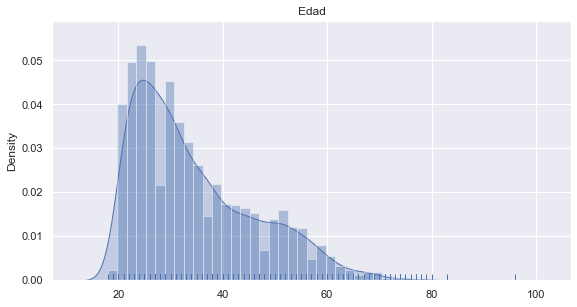

In [3]:
f = plt.figure(figsize=(8,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])
sns.distplot(df['age'].values, ax=ax, rug=True, hist=True, kde_kws={"shade": True}, label = 'los angeles')
ax.set_title('Edad')
plt.show()

1: reincidente, 0: no reincidente


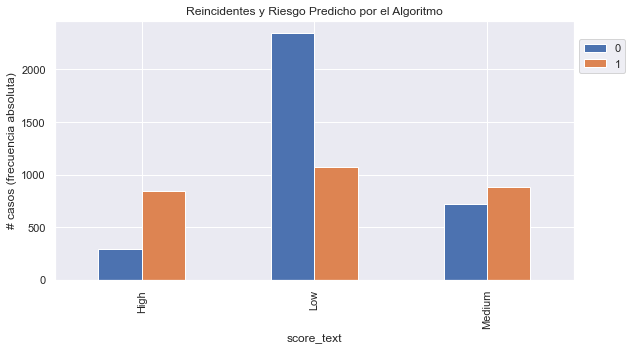

In [4]:
print("1: reincidente, 0: no reincidente")

f = plt.figure(figsize=(8,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])
df.groupby('two_year_recid').score_text.value_counts().unstack(0).plot.bar(ax=ax)
ax.set_title('Reincidentes y Riesgo Predicho por el Algoritmo')
ax.set_ylabel('# casos (frecuencia absoluta)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.95))
plt.show()


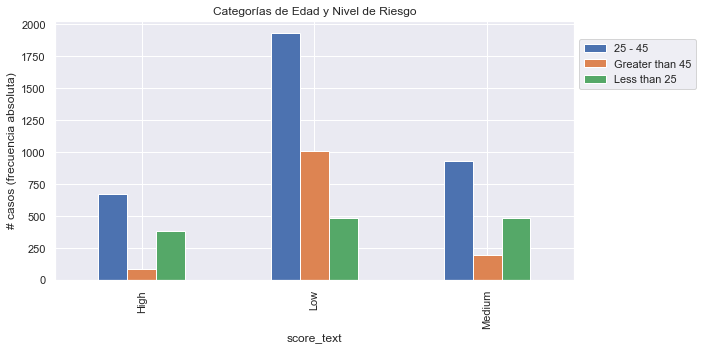

In [5]:
f = plt.figure(figsize=(8,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])
df.groupby('age_cat').score_text.value_counts().unstack(0).plot.bar(ax=ax)
ax.set_title('Categorías de Edad y Nivel de Riesgo')
ax.set_ylabel('# casos (frecuencia absoluta)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.95))
plt.show()

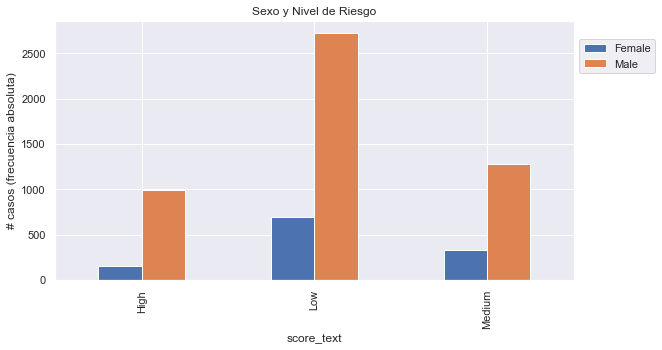

In [6]:
f = plt.figure(figsize=(8,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])
df.groupby('sex').score_text.value_counts().unstack(0).plot.bar(ax=ax)
ax.set_title('Sexo y Nivel de Riesgo')
ax.set_ylabel('# casos (frecuencia absoluta)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.95))
plt.show()

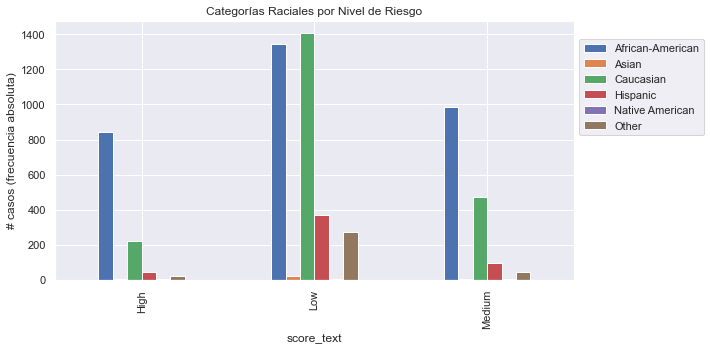

In [7]:
f = plt.figure(figsize=(8,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])
df.groupby('race').score_text.value_counts().unstack(0).plot.bar(ax=ax)
ax.set_title('Categorías Raciales por Nivel de Riesgo')
ax.set_ylabel('# casos (frecuencia absoluta)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.95))
plt.show()

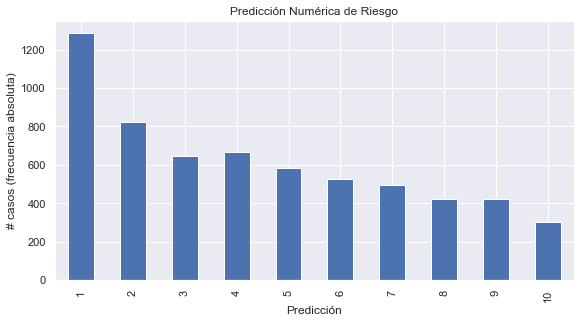

In [8]:
f = plt.figure(figsize=(8,4))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])
df.groupby('decile_score').decile_score.value_counts().plot.bar(ax=ax)
ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10])
ax.set_title('Predicción Numérica de Riesgo')
ax.set_xlabel('Predicción')
ax.set_ylabel('# casos (frecuencia absoluta)')

plt.show()

# Actividades

Un primer criterio para evaluar los eventuales "sesgos" (biases) de una IA consiste en determinar si selecciona algún atributo "protegido" de las personas como ***factor*** de decisión. En este taller, partiremos considerando el efecto de los factores raza, edad, y sexo en la decisión de la máquina de clasificar a una persona como de "alto riesgo de reincidencia". 

Otro criterio bastante común para evaluar el nivel de imparcialidad ("fairness") de una IA es comparar su ***eficacia*** en los diferentes grupos/segmentos de la población que se crean al considerar un atributo "protegido". En este taller, analizaremos el efecto de los factores raza, edad, y sexo, en los ***falsos positivos*** de la IA, es decir, la probabilidad de que la máquina haya clasificado una persona como de Alto Riesgo cuando en realidad la persona no reincidió después de ser liberada ('two_year_recid' != 1). 

## A) Raza, Edad, y Sexo en las Decisiones de la IA

Considere la población P1 de personas que la IA predice como sujetos de alto riesgo y la población P2 de personas el algoritmo predice como sujetos de bajo riesgo. Queremos determinar si existe evidencia suficiente para concluir que la raza, edad, y sexo son factores que la IA considera al momento de decidir a cuál de estas poblaciones pertenece una persona. Se le pide entonces:

1.   Diseñe un contraste que permita evaluar la hipótesis de que *la proporción de afroamericanos en P1 es mayor que la proporción de afroamericanos en P2*. Diseñe su contraste de manera que la probabilidad de aceptar incorrectamente esta conjetura es menor al 1%. Exponga con claridad la hipótesis, la región crítica, y la decisión que corresponde tomar. Justifique su elección de H1.

2.   Diseñe un contraste que permita evaluar la hipótesis de que *la proporción de  mujeres en P1 es menor que la proporción de mujeres en P2*. Diseñe su contraste de manera que la probabilidad de aceptar incorrectamente esta conjetura es menor al 1%. Exponga con claridad la hipótesis, la región crítica, y la decisión que corresponde tomar. Justifique su elección de H1. 

3.   Diseñe un contraste que permita evaluar la hipótesis de que *la edad media en P1 es menor que la edad media en P2*. Diseñe su contraste de manera que la probabilidad de aceptar incorrectamente esta conjetura es menor al 1%. Exponga con claridad la hipótesis, la región crítica, y la decisión que corresponde tomar. Justifique su elección de H1. 

4.   Determine experimentalmente el p-valor asociado a cada uno de los 3 contrastes reduciendo gradualmente el nivel de significación desde un valor muy grande (e.g. 0.99). Determine luego el valor exacto usando la teoría. Comente sobre significado del resultado en cada caso. 

5.  Indique cómo cambian los resultados anteriores si se trabaja con una muestra igual a 1/4 de la muestra disponible. Para esto seleccione aleatoriamente 1/4 de la muestra original.


Cierre esta sección comentando porqué podría ser inadecuado conducir el análisis condicionando al factor bajo estudio (e.g. raza) para luego comparar la proporción de personas de ese grupo que la IA clasifica como de alto riesgo con la proporción de personas que la IA clasifica como de bajo riesgo. 

In [9]:
my_alpha=0.01

df_alto_riesgo = df[df['score_text']=='High']
df_bajo_riesgo = df[df['score_text']=='Low']


In [10]:
from scipy.stats import norm, t


def contraste_estadistico(n1,n2,p1,p2):
    prop_combinada = (n1*p1 + n2*p2)/(n1+n2)
    error_std = np.sqrt(prop_combinada*(1-prop_combinada))*np.sqrt(1/n1 + 1/n2)
    return (p1-p2)
    
def contraste_estadistico_proporciones(n1,n2,p1,p2, alt='1>2'):
    prop_combinada = (n1*p1 + n2*p2)/(n1+n2)
    std_error= np.sqrt(prop_combinada*(1-prop_combinada))*np.sqrt(1/n1 + 1/n2)
    region_critica = []
    z0 = (p1-p2)/std_error

    if (alt == '1>2'):

        region_critica.append(pd.Interval(left=norm.ppf(1-0.01) ,right = np.inf, closed = 'neither'))
        
        p_value = 1 - norm.cdf(z0)


    elif (alt == '1<2'):

        region_critica.append(pd.Interval(left= -np.inf, right = norm.ppf(0.01), closed = 'neither'))
        
        p_value = norm.cdf(z0)

    return z0, region_critica, p_value




def contraste_estadistico_medias(n1, n2, m1, m2, std1, std2, alt='1>2'):
    gl_num = (std1**2/n1 + std2**2/n2)**2
    gl_den = ((std1**2/n1)**2)/(n1-1) + (std2**2/n2)**2/(n2-1)
    gl = int(np.floor(gl_num/gl_den))
    error_std = np.sqrt(std1**2/n1 + std2**2/n2)
    t0 = (m1-m2)/error_std
    region_critica = []

    if (alt == '1>2'):
        region_critica.append(pd.Interval(left = t.ppf(1-0.01, df=gl), right = np.inf, closed = 'neither'))
        p = 1-t.cdf(t0, df=gl)

    elif(alt == '1<2'):
        region_critica.append(pd.Interval(left = -np.inf, right = t.ppf(0.01, df=gl), closed = 'neither'))
        p = t.cdf(t0, df=gl)
    
    return t0, region_critica, p


***Pregunta A.1***

*H0=la proporción de afroamericanos en P1(sujetos de alto riesgo) es igual que la proporción de afroamericanos en P2(sujetos de bajo riesgo)* p2=p1


*H1=la proporción de afroamericanos en P1(sujetos de alto riesgo) es mayor que la proporción de afroamericanos en P2(sujetos de bajo riesgo)* p1>p2





In [11]:
negros_alto_riesgo = df_alto_riesgo[df_alto_riesgo['race'] == 'African-American']
negros_bajo_riesgo = df_bajo_riesgo[df_bajo_riesgo['race'] == 'African-American']

p2 = len(negros_bajo_riesgo)/len(df_bajo_riesgo) #p2
p1 = len(negros_alto_riesgo)/len(df_alto_riesgo) #p1

z0,region,p = contraste_estadistico_proporciones(len(negros_bajo_riesgo),len(negros_alto_riesgo),p2, p1, '1>2')
result= "p2 < p1" if np.any([z0 in reg for reg in region]) else "no podemos rechazar p1 = p2"
print("-----------------------------------------")
print('z0: ', z0, 'region_critica: ',[str(reg) for reg in region])
print('p_value: ', p)
print("Decision: ", result)
print("-----------------------------------------")



-----------------------------------------
z0:  -15.751612482168303 region_critica:  ['(2.3263478740408408, inf)']
p_value:  1.0
Decision:  no podemos rechazar p1 = p2
-----------------------------------------


Siendo la hipotesis nula que la proporcion de afroamericanos con mayor riesgo es igual a la proporcion de afroamericanos con menor riesgo, se plantea una hipotesis alternativa que corresponde a que la proporcion de afroamericanos con mayor riesgo es mayor a la proporcion de afroamericanos con menor riesgo.

Ya teniendo definidas las hipotesis, se utiliza la formula de contraste para dos proporciones con un grado de aceptacion de 1% (alpha = 0.01) con lo cual arroja que no se puede rechazar la hipotesis nula, ya que el valor de la z0 no pertenece a la region critica definida por nuestro grado de aceptacion.

Mas aun, se puede ver que la hipotesis nula se podria considerar verdadera en base al valor de p, el cual es 1.0.


***Pregunta A.2***


*H0 = la proporción de  mujeres en P1 es menor que la proporción de mujeres en P2* p1=p2

*H1 = la proporción de  mujeres en P1 es mayor que la proporción de mujeres en P2* p1 < p2

In [12]:
mujeres_alto_riesgo = df_alto_riesgo[df_alto_riesgo['sex'] == 'Female']
mujeres_bajo_riesgo = df_bajo_riesgo[df_bajo_riesgo['sex'] == 'Female']

p1 = len(mujeres_alto_riesgo)/len(df_alto_riesgo) 
p2 = len(mujeres_bajo_riesgo)/len(df_bajo_riesgo) 


z0,region,p = contraste_estadistico_proporciones(len(mujeres_alto_riesgo),len(mujeres_bajo_riesgo),p1, p2, '1>2')
result= "p2 > p1" if np.any([z0 in reg for reg in region]) else "no podemos rechazar p1 = p2"
print("-----------------------------------------")
print('z0: ', z0, 'region_critica: ',[str(reg) for reg in region])
print('p_value: ', p)
print("Decision: ", result)
print("-----------------------------------------")


-----------------------------------------
z0:  -2.0485725437627735 region_critica:  ['(2.3263478740408408, inf)']
p_value:  0.9797480341416301
Decision:  no podemos rechazar p1 = p2
-----------------------------------------


Siendo la hipotesis nula que la proporcion de mujeres con mayor riesgo es igual a la proporcion de mujeres con menor riesgo, se plantea una hipotesis alternativa que corresponde a que la proporcion de afroamericanos con mayor riesgo es menor a la proporcion de afroamericanos con menor riesgo.

Ya teniendo definidas las hipotesis, se utiliza la formula de contraste para dos proporciones con un grado de aceptacion de 1% (alpha = 0.01) con lo cual arroja que no se puede rechazar la hipotesis nula, ya que el valor de la z0 no pertenece a la region critica definida por nuestro grado de aceptacion.


Esta decision se reafirma ya que el p-value es 0.97 (p>0.05) lo que tambien señala que la hipotesis nula es verdadera

***Pregunta A.3***

*H0 = a edad media en P1 es menor que la edad media en P2* media 1 = media 2

*H1 = a edad media en P1 es mayor que la edad media en P2* media 1 < media 2

In [13]:
edad_alto_riesgo = df_alto_riesgo['age']
edad_bajo_riesgo = df_bajo_riesgo['age']

m1 = edad_alto_riesgo.mean()
m2 = edad_bajo_riesgo.mean()
std1 = edad_alto_riesgo.std()
std2 = edad_bajo_riesgo.std()


z0,region,p = contraste_estadistico_medias(len(edad_alto_riesgo),len(edad_bajo_riesgo),m1, m2, std1, std2,'1>2')
result= "p2 > p1" if np.any([z0 in reg for reg in region]) else "no podemos rechazar p1 = p2"
print("-----------------------------------------")
print('z0: ', z0, 'region_critica: ',[str(reg) for reg in region])
print('p_value: ', p)
print("Decision: ", result)
print("-----------------------------------------")

-----------------------------------------
z0:  -25.421473738055237 region_critica:  ['(2.327649713115185, inf)']
p_value:  1.0
Decision:  no podemos rechazar p1 = p2
-----------------------------------------


Siendo la hipotesis nula que la media de la edad con mayor riesgo es igual a la media de la edad con menor riesgo, se plantea una hipotesis alternativa que corresponde a que la proporcion de afroamericanos con mayor riesgo es mayor a la proporcion de afroamericanos con menor riesgo.

Ya teniendo definidas las hipotesis, se utiliza la formula de contraste para dos proporciones con un grado de aceptacion de 1% (alpha = 0.01) con lo cual arroja que no se puede rechazar la hipotesis nula, ya que el valor de la z0 no pertenece a la region critica definida por nuestro grado de aceptacion.

Mas aun, se puede ver que la hipotesis nula se podria considerar verdadera en base al valor de p, el cual es 1.0.

***Pregunta A.4***

Determine experimentalmente el p-valor asociado a cada uno de los 3 contrastes reduciendo gradualmente el nivel de significación desde un valor muy grande (e.g. 0.99). Determine luego el valor exacto usando la teoría. Comente sobre significado del resultado en cada caso.

## B) Eficacia de la IA según Raza, Edad, y Sexo

Considere primero el nivel de riesgo numérico que el algoritmo asignó a la población de personas que se sabe que no-reincidieron (claramente, asignar un puntaje alto a estas personas es un error de la máquina). Queremos determinar si *existe evidencia para concluir que el puntaje medio que la máquina asigna a personas de algún grupo protegido es mayor que el puntaje medio que la máquina asigna a personas de un grupo de control*. 

1.   Diseñe un contraste que permita determinar si el puntaje medio que la máquina asigna a personas afroamericanas no-reincidentes es mayor que el puntaje medio que la máquina asigna a personas de raza blanca no-reincidentes. Exponga con claridad sus hipótesis, indicando los criterios que utilizó para elegir H1 (favor lea bien el párrafo de más arriba). Indique la decisión que tomaría a partir del p-valor del contraste.

2.   Diseñe un contraste que permita determinar si el puntaje medio que la máquina asigna a mujeres no-reincidentes es menor que el puntaje medio que la máquina asigna a hombres no-reincidentes. Exponga con claridad sus hipótesis, indicando los criterios que utilizó para elegir H1 (favor lea bien el párrafo inicial). Indique la decisión que tomaría a partir del p-valor del contraste.

3.   Diseñe un contraste que permita determinar si el puntaje medio que la máquina asigna a personas menores de 25 años es mayor que el puntaje medio que la máquina asigna al resto de las personas. Exponga con claridad sus hipótesis, indicando los criterios que utilizó para elegir H1. Indique la decisión que tomaría a partir del p-valor del contraste.



In [14]:
print("\n#### Predicciones Numéricas ####")


print("\n ... Raza .... ")
df_afroamericanos = df[(df['race']=='African-American') & (df['two_year_recid']!=1)]#afroamericanos y no reincidentes
df_control = df[(df['race']=='Caucasian') & (df['two_year_recid']!=1)]#blancos y no reincidentes

print("\n ... Edad .... ")
df_jovenes = df[(df['age_cat']=='Less than 25') & (df['two_year_recid']!=1)]#jovenes y no reincidentes
df_control = df[(df['age_cat']!='Less than 25') & (df['two_year_recid']!=1)]#no jovenes y no reincidentes

print("\n ... Sexo .... ")
df_mujeres = df[(df['sex']=='Female') & (df['two_year_recid']!=1)]
df_control = df[(df['sex']!='Female') & (df['two_year_recid']!=1)]



#### Predicciones Numéricas ####

 ... Raza .... 

 ... Edad .... 

 ... Sexo .... 



Considere ahora la predicción discreta del algoritmo. Supongamos que medimos la eficacia del algoritmo usando la probabilidad de que arroje un ***falso positivo***, es decir, la probabilidad de que clasifique una persona como de Alto Riesgo pero que la persona no reincida ('two_year_recid' != 1). 

4.   Para cada uno de los grupos protegidos considerados antes (jóvenes, mujeres, afroamericanos), diseñe un contraste que permita determinar si la proporción de falsos positivos es mayor en ese grupo respecto de su respectivo grupo de control. Indique la decisión que tomaría a partir del p-valor del contraste.

In [15]:
print("\n#### Predicciones Categóricas ####")
my_alpha = 0.01

####FALSOS POSITIVOS GLOBALES
n_FP = len(df.loc[(df['two_year_recid'] != 1) & (df['score_text'] == 'High'),['name']])
frac_FP = n_FP/len(df)
print("FFP", frac_FP )

print("\n ... Raza .... ")
df_afroamericanos = df[df['race']=='African-American']
df_control = df[df['race']=='Caucasian']
n_FalsePos_afroamericanos = len(df_afroamericanos.loc[(df_afroamericanos['two_year_recid'] != 1) & (df_afroamericanos['score_text'] == 'High'),['name']])
n_FalsePos_control = len(df_control.loc[(df_control['two_year_recid'] != 1) & (df_control['score_text'] == 'High'),['name']])



#### Predicciones Categóricas ####
FFP 0.04812054439403759

 ... Raza .... 


# Resumen y Conclusiones

Elabore un resumen ejecutivo y ofrezca conclusiones generales del estudio.